# In Class Exercise 7.6 - Solutions for Problems 1 and 2
We are going practice integrating what we have learned this semester. This exercise will help you practice thinking about problems and coding solutions. 

## Imports and Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For slightly nicer charts
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 150
sns.set(style="ticks")

***
## Washington Post Unsolved Homicides
The dataset title `'homicide-revised.csv'` is adapted from a dataset developed by the Washington Post for [this article](https://www.washingtonpost.com/graphics/2018/investigations/where-murders-go-unsolved/?noredirect=on&utm_term=.e03c4dc31643) that examined unsolved homicides in the United States. First, make a dataframe called 'df' from the csv.

In [3]:
# read the data file
df = pd.read_csv('homicide-revised.csv') 

***
### Cities with Youngest and Cities with the Oldest Victims
We want to know the three cities with the youngest victims on average and the three cities with the oldest victims on average.
Each row of the dataframe represents one homicide. In each row there is information about city and the age that we can use to answer our questions.
Before we get going with our analysis we need to check the data.

#### 1a. Examine columns names and datatypes.
Use `info()` to look at the column names and look at the datatypes. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 7 columns):
victim_race    52179 non-null object
victim_age     52179 non-null object
victim_sex     52179 non-null object
city           52179 non-null object
state          52179 non-null object
disposition    52179 non-null object
year           52179 non-null int64
dtypes: int64(1), object(6)
memory usage: 2.8+ MB


Notice that victim_age is a non-null object. We would probably expect that to be an integer or a float. This probably isn't a clean dataset. We have some work ahead of us. 

#### 1b. Examine 'victim_age'.
Use `describe()` to see if you can get a better sense of what's in this column.

In [5]:
df['victim_age'].describe()

count       52179
unique        102
top       Unknown
freq         2999
Name: victim_age, dtype: object

So the the 'victim_age' series has 52179 rows and 102 unique values. However, the most commonly occurring value is 'Unknown' which occurred 2999 times.
We are not going to be able to calculate much with 'Unknown' sitting in the column. 

#### 1c. Write a function to exclude 'Unknown'
The remove_unknown function should take a single value called 'value' and then returns None if the value in 'Unknown'. If the value is not 'Unknown' the function will return the value as an integer (remember the `int()` function)?

In [6]:
def remove_unknown(age_str):
    if age_str == 'Unknown':
        return None
    else:
        return int(age_str)

#### 1d. Make a new column 
The new column should be called 'age' and should contain only integers from the 'victim_age' column. Use `map()` and `remove_unknown()` to create the column.
For a reminder of how `map()` works, an example has been included at the bottom of this notebook.


In [7]:
# create a new series (column) in the data frame using .map
df['age'] = df['victim_age'].map(remove_unknown)

# check to make sure it worked
df.head()

,victim_race,victim_age,victim_sex,city,state,disposition,year,age
0,Hispanic,78,Male,Albuquerque,NM,Closed without arrest,2010,78.0
1,Hispanic,17,Male,Albuquerque,NM,Closed by arrest,2010,17.0
2,White,15,Female,Albuquerque,NM,Closed without arrest,2010,15.0
3,Hispanic,32,Male,Albuquerque,NM,Closed by arrest,2010,32.0
4,White,72,Female,Albuquerque,NM,Closed without arrest,2010,72.0


#### 1e. Analysis using 'age'. 
So now we should be able to answer our original question about the three cities with the youngest and oldest homicide victims. As you do this, remember that each row is a homicide, not a city, so you will need to aggregate the data somehow... 

In [8]:
# find the three cities with the youngest average age
print('Youngest Average:')
print(df.groupby(by='city')['age'].mean().sort_values().head(3))

print()

# find the three cities with the oldest average age
print('Oldest Average:')
print(df.groupby(by='city')['age'].mean().sort_values().tail(5))

Youngest Average:
city
Boston        28.385993
Chicago       28.545126
Pittsburgh    29.550079
Name: age, dtype: float64

Oldest Average:
city
Albuquerque    35.182663
Las Vegas      35.433990
San Diego      36.707965
Dallas               NaN
Phoenix              NaN
Name: age, dtype: float64


#### 1f. Mystery NaN values. 
If you used groupby and sort_values to solve the problem above its likely that you noticed that Dallas and Phoenix both have NaN values for their mean age. That should get your attention. We know there were some NaN values in the age series (coming from the None values we returned in our function) but our analysis doesn't have trouble with other cities (such as Albuquerque). 

Use your coding tools to look at the series and see if you can figure out how Dallas and Phoenix are different. Try not to just scroll through the whole dataset manually. Its huge, and won't help you practice thinking about coding.

In [9]:
# why do Dallas and Phoenix return NaN when we use groupby and mean?

df_dallas = df.query('city == "Dallas"')
print('Unique age values for Dallas:', df_dallas['age'].unique())

df_phnx = df.query('city == "Phoenix"')
print('Unique age values for Phoenix:', df_phnx['age'].unique())

df_alb = df.query('city == "Albuquerque"')
print('Unique age values for Albuquerque:', df_alb['age'].unique())

# because Dallas and Phoenix have no age values at all

Unique age values for Dallas: [nan]
Unique age values for Phoenix: [nan]
Unique age values for Albuquerque: [78. 17. 15. 32. 72. 91. 52. 56. 43. 20. nan 46. 16. 54. 22. 49. 25. 47.
 88. 27. 36.  1. 58. 42. 50.  3. 21. 19. 95. 24. 41. 51. 18.  8. 64. 30.
  2. 39. 45. 31.  0. 23. 28. 35. 26. 40. 94. 33. 57. 55. 29. 53. 66.  5.
 74. 69. 37. 59. 34. 38. 44. 14.  9. 65. 90. 48. 62. 60.  4. 70. 10. 11.
 63.  6. 73.]


#### 1g. Creating a new dataframe with no NaN.
So let's say you looked at your data in detail and you decide to drop any rows where the age is NaN. Using the tools we have so far, how could we do this? One way would be to use `.query()`. See if you can figure out how to use query to create a new dataset that only contains rows with age values.

In [10]:
df_nan_removed = df.query('age > -1 and age < 999')
print(df_nan_removed.groupby(by='city')['age'].mean().sort_values().tail(5))

city
Denver         34.573718
New York       34.685805
Albuquerque    35.182663
Las Vegas      35.433990
San Diego      36.707965
Name: age, dtype: float64


***
### Visualizing Solved and Unsolved Homicide Rates in Two Cities
Our new goal: Write a program that allows a user to select two separate cities and then compares those two city's rates of solved and unsolved homicides using a single visualization. Note! The rate here refers to the percentage of total homicides that are solved or unsolved. 

#### 2a. Identify the Cities a User Could Pick From
Let's create new variable called 'city_list' that contains the unique city values as a list. After that, write a function called print_cities that takes the city_list as an argument, and prints instructions (for the user telling them they choose from the following list) and then the city_list. 

In [11]:
city_list = df['city'].unique().tolist()

def print_cities(city_list):
    print('You can choose from the following cities:')
    print(city_list)

print_cities(city_list)

You can choose from the following cities:
['Albuquerque', 'Atlanta', 'Baltimore', 'Baton Rouge', 'Birmingham', 'Boston', 'Buffalo', 'Charlotte', 'Chicago', 'Cincinnati', 'Columbus', 'Dallas', 'Denver', 'Detroit', 'Durham', 'Fort Worth', 'Fresno', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Long Beach', 'Los Angeles', 'Louisville', 'Memphis', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'New Orleans', 'New York', 'Oakland', 'Oklahoma City', 'Omaha', 'Philadelphia', 'Phoenix', 'Pittsburgh', 'Richmond', 'San Antonio', 'Sacramento', 'Savannah', 'San Bernardino', 'San Diego', 'San Francisco', 'St. Louis', 'Stockton', 'Tampa', 'Tulsa', 'Washington']


#### 2b. Ask the user to enter a city and check to see if its a valid city
Write a function called `ask_city` that asks for the user to input a city, checks to make sure the input is a valid city listed in the dataset, prompts for another entry if it is not, and returns the valid city name.

It's been a little while since we've done this sort of thing. How would we make the program loop over and over again until it gets a valid city?
How could we check to see if the city that the user entered was in our city list? Here's a hint:

In [12]:
fruit_list = ['apple','pear','peach']
'grape' in fruit_list

False

In [13]:
# ask for cities until an entry matches a city in city_list
def ask_city():
    while True: 
        city_selection = input('Please enter a valid city:')
        if city_selection in city_list:
            return city_selection
        else:
            print('That is not a valid city. Please try again.')

#### 2c. Get two unique cities
Use ask_city twice to get two cities and assign them to 'city1' and 'city2'.

In [14]:
# ask for the user to provide cities
city1 = ask_city()
city2 = ask_city() 

Please enter a valid city: Chicago
Please enter a valid city: Washington


#### 2d. Converting our outcome variable
To answer our research question we are interested in getting the rates of homicides that are solved. This information is in the column 'disposition'.
Take a look at the unique values in the disposition column.

In [15]:
df['disposition'].unique()

array(['Closed without arrest', 'Closed by arrest', 'Open/No arrest'],
      dtype=object)

Notice that there are three outcomes when we really only want two. Make a new column in the dataframe called `'outcome'`, that has the value 'Solved' if the disposition of the case is 'Closed by arrest', otherwise the value should be 'Unsolved'. Then create a new column in the dataframe called 'Outcome' that specifies if the case is 'Solved' or 'Unsolved'.

In [16]:
# assign disposition status to solved or unsolved outcome
def case_status(status):
    if status == 'Closed by arrest':
        return 'Solved'
    else:
        return 'Unsolved'
    
# create a new series (column) that classfies casses as solved or unsolved
df['Outcome'] = df['disposition'].map(case_status)

#### 2e. Create a new dataframe with only the selected cities
Given the tools we have it may be easier to visuzalize the data if we narrow down our data to just the cities the user has selected. Use `query()` and string formatting to make a new dataframe called df_selected_cities. It's probably been a while since you string formatting. Remember that you can use curly braces,`{}`, to insert variables into strings when using `.format()`. 

In [17]:
# we can select a subset of the data by using query and string formatting
df_selected_cities = df.query("city == '{}' or city == '{}'".format(city1, city2))

#### 2f. Find the rates 
We want to make a visualization comparing the rates. To do this we need to compute rates for solved' and unsolved cases. If you remember back to the Titanic exercise, `pd.crosstabs()` gives us a way to create a new dataframe with the rates that we can use for visualizing. Use crosstabs to get the percentages you need then assign the crosstabs result to a new variable called 'df_percent'.

In [18]:
df_percent = pd.crosstab(df_selected_cities['city'], df_selected_cities['Outcome'], normalize = 'index')
df_percent

Outcome,Solved,Unsolved
city,,
Chicago,0.264137,0.735863
Washington,0.562082,0.437918


#### 2g. Reset the Index 
If you look at df_percent you will see its a small table that is pretty straightfoward. However, `pd.crosstabs()` has made 'city' the index of the dataframe. It would be easier to plot this table with the tools we've learned if we make 'city' a regular column. To do this, use the `reset_index()` method on 'df' and assign the results to a new dataframe called 'df_percent'. 

In [19]:
# execute this cell before you plot the data
df_percent = df_percent.reset_index()
df_percent

Outcome,city,Solved,Unsolved
0,Chicago,0.264137,0.735863
1,Washington,0.562082,0.437918


#### 2h. Plot the rates 
Use a bar chart with 'df_percent' to plot the Solved and Unsolved rates of both cities on a single plot. Note: Try using the " align = 'edge' " argument with `plt.bar` to get the bars to align over the cities.

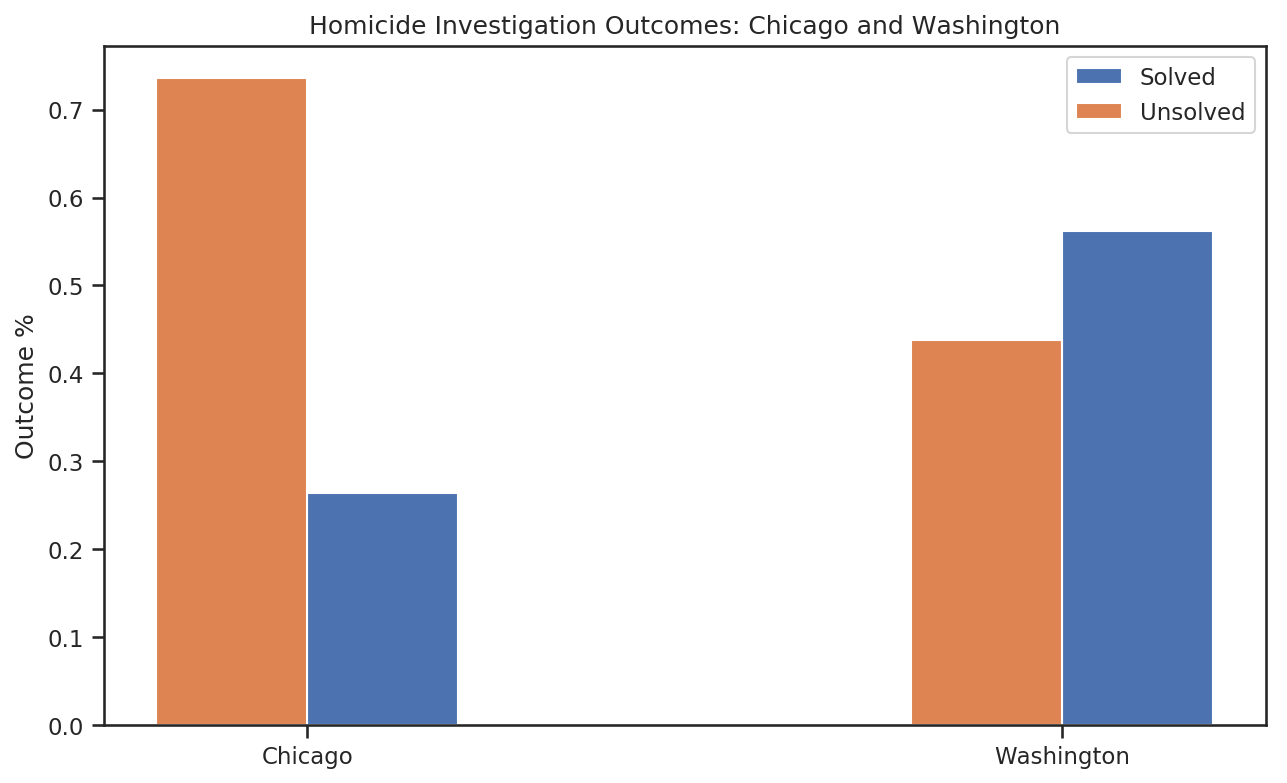

In [20]:
# use matplotlib to make the bar charts, note the addition of width and align, if these are not included
# matplotlib will display the bars over one another
plt.bar(x = 'city' , height = 'Solved' , width = 0.2 , data = df_percent, align = 'edge')
plt.bar(x = 'city' , height = 'Unsolved' , width = -0.2, data = df_percent, align = 'edge')
plt.ylabel('Outcome %')
plt.legend(['Solved','Unsolved'])
plt.title('Homicide Investigation Outcomes: {} and {}'.format(city1, city2))
plt.show()

#### 2i. Test your code. Find the bugs.
Rerun your code above to try out comparisons between several different cities. What happens if you enter the same city twice? Could you fix the code so this can't happen?

***
### Examining Homicides in Chicago
#### 3. Use descriptive statistics and visualizations to explore the role of ethnicity, sex, age, and year in homicide investigations in Chicago. 
Now its up to you. Use the tools we have worked with above to examine homicides in Chicago.

In [21]:
# write and test your code here

***
### Example: Using Map

In [22]:
df_grads = pd.read_csv('recent-grads.csv')

def get_major_length(major):
    major_length = len(major)
    return major_length

df_grads['Major_Length'] = df_grads['Major'].map(get_major_length)